# **What is NLP?**

NLP is a field of linguistics and machine learning focused on understanding everything related to human language. The aim of NLP tasks is not only to understand single words individually, but to be able to understand the context of those words.

1. Classifying whole sentences: Getting the sentiment of a review, detecting if an email is spam, determining if a sentence is grammatically correct or whether two sentences are logically related or not
2. Classifying each word in a sentence: Identifying the grammatical components of a sentence (noun, verb, adjective), or the named entities (person, location, organization)
3. Generating text content: Completing a prompt with auto-generated text, filling in the blanks in a text with masked words
4. Extracting an answer from a text: Given a question and a context, extracting the answer to the question based on the information provided in the context
5. Generating a new sentence from an input text: Translating a text into another language, summarizing a text


NLP isn’t limited to written text though. It also tackles complex challenges in speech recognition and computer vision, such as generating a transcript of an audio sample or a description of an image.

### **Why is it challenging?**

Computers don’t process information in the same way as humans. For example, when we read the sentence “I am hungry,” we can easily understand its meaning. Similarly, given two sentences such as “I am hungry” and “I am sad,” we’re able to easily determine how similar they are. For machine learning (ML) models, such tasks are more difficult. The text needs to be processed in a way that enables the model to learn from it. And because language is complex, we need to think carefully about how this processing must be done

# **Transformers**

The Transformer module is a deep learning architecture introduced in the paper "Attention is All You Need" (2017). It revolutionized Natural Language Processing (NLP) by eliminating the need for recurrent layers (RNNs/LSTMs) and instead relying on self-attention mechanisms to process sequences in parallel.

The 🤗 Transformers library provides the functionality to create and use those shared models. The Model Hub contains thousands of pretrained models that anyone can download and use.

In [ ]:
# Install the Transformers, Datasets, and Evaluate libraries to run this notebook.
# !pip install datasets evaluate transformers[sentencepiece]

### **Working with Pipelines**

In [ ]:
from transformers import pipeline

classifiers = pipeline('sentiment-analysis')

input = 'Hi, I am happy today.'

classifiers(input)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998624324798584}]

In [ ]:
# Passing a list of sentences

input = ['Hey you are looking bad today, any issue?', 'I am happy because i was sad yesterday']
classifiers(input)

[{'label': 'NEGATIVE', 'score': 0.999478280544281},
 {'label': 'POSITIVE', 'score': 0.9998522996902466}]

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

**There are three main steps involved when you pass some text to a pipeline:**

1. The text is **preprocessed** into a format the model can understand.
2. The **preprocessed** inputs are passed to the model.
3. The predictions of the model are **post-processed**, so you can make sense of them.

Some famouse pipelines:
1. feature-extraction (get the vector representation of a text)
2. fill-mask
3. ner (named entity recognition)
4. question-answering
5. sentiment-analysis
6. summarization
7. text-generation
8. translation
9. zero-shot-classification

Visit here for [pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines) or you can also define your custom pipelines.

### **ZERO SHOT Classification**
This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model.

This is useful when you want to check if perticular sentence best fits in perticular domain or not?

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

classifier(
    "The world is full of sorrow, you have to find your own happiness.",
    candidate_labels=["education", "politics", "business"]
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


{'sequence': 'The world is full of sorrow, you have to find your own happiness.',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.4332239031791687, 0.30876797437667847, 0.25800812244415283]}

In [ ]:
classifier(
    "Save Democracy.",
    candidate_labels=["education", "politics", "social"]
)

{'sequence': 'Save Democracy.',
 'labels': ['social', 'politics', 'education'],
 'scores': [0.6651252508163452, 0.2572452425956726, 0.07762949168682098]}

This pipeline is called zero-shot because you don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!

### **TEXT Generation**
The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text.

In [ ]:
from transformers import pipeline

generator = pipeline('text-generation')

generator("Let me know, if you need any")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Let me know, if you need any help, please reach out, or I\'m looking forward to speaking about how we should help more," said Lorna.\n\nA second round of court hearing ended Friday, with the justices sitting again on'}]

In [ ]:
generator("Learning is")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Learning is essential, the more you understand your own brain, the less likely you are to misjudge those around you. As a result, the more you know your brain, the less you ever mistake her or your child.\n\n7.'}]

### **Using any model from the Hub in a pipeline**
The previous examples used the default model for the task at hand, but you can also choose a particular model from the Hub to use in a pipeline for a specific task — say, text generation. Go to the [Model Hub](https://huggingface.co/models) and click on the corresponding tag on the left to display only the supported models for that task.

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", "distilgpt2") # Using distilgpt2

generator("Learning is")

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Learning is a social experiment where we show how to socialize. We show how to socialize with other people, learn ways of communicating with people, and have fun. If the answer isn’t really, the next step is to learn more'}]

### **Inference API**
All the models can be tested directly through your browser using the Inference API, which is available on the [Hugging Face website](https://huggingface.co/). You can play with the model directly on this page by inputting custom text and watching the model process the input data.

[LLM Tools](https://github.com/underlines/awesome-ml/blob/master/llm-tools.md#backends)

### **Mask Filling**
The idea of this task is to fill in the blanks in a given text.

In [ ]:
from transformers import pipeline

filler = pipeline('fill-mask')

filler("India is a <mask>.", top_k=2)


No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.316749632358551,
  'token': 4593,
  'token_str': ' democracy',
  'sequence': 'India is a democracy.'},
 {'score': 0.09385084360837936,
  'token': 36184,
  'token_str': ' superpower',
  'sequence': 'India is a superpower.'}]

The top_k argument controls how many possibilities you want to be displayed.

### **Named entity recognition (NER)**

Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations.

In [ ]:
from transformers import pipeline

recog = pipeline("ner", grouped_entities=True)

recog("My name is Aditya, I work at Zeomega Infotech Pvt Ltd and I am from India.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'entity_group': 'PER',
  'score': np.float32(0.9982126),
  'word': 'Aditya',
  'start': 11,
  'end': 17},
 {'entity_group': 'ORG',
  'score': np.float32(0.98272604),
  'word': 'Zeomega Infotech Pvt Ltd',
  'start': 29,
  'end': 53},
 {'entity_group': 'LOC',
  'score': np.float32(0.9996581),
  'word': 'India',
  'start': 68,
  'end': 73}]

We pass the option **grouped_entities=True** in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity: here the model correctly grouped **"Zeomega", “Infotech”, "Pvt" and "ltd"** as a single organization, even though the name consists of multiple words.

### **Question answering**

The question-answering pipeline answers questions using information from a given context. Note that this pipeline works by extracting information from the provided context; it does not generate the answer.

In [ ]:
from transformers import pipeline

question_answer = pipeline("question-answering")

question_answer(
    question="Where do i live?",
    context="My name is Aditya, I From india. and I am a python developer."
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.9135820269584656, 'start': 26, 'end': 31, 'answer': 'india'}

### **Summarization**
Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text.

In [ ]:
from transformers import pipeline

summerizer = pipeline('summarization')

summerizer(
    """
    India, officially the Republic of India, is a country in South Asia.
    It is the seventh-largest country by area; the most populous country from June 2023 onwards;
    and since its independence in 1947, the world's most populous democracy.
    Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest,
    and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;
    China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east.
    In the Indian Ocean, India is near Sri Lanka and the Maldives; its Andaman and Nicobar
    Islands share a maritime border with Thailand, Myanmar, and Indonesia.
    """
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


[{'summary_text': " India, officially the Republic of India, is a country in South Asia . It is the seventh-largest country by area; the most populous country from June 2023 onwards . Since its independence in 1947, it is the world's most populous democracy . It shares land borders with Pakistan, China, Nepal, Bhutan, and Bhutan; and Bangladesh and Myanmar to the east ."}]

### **Translation**
For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the Model Hub.

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


[{'translation_text': 'This course is produced by Hugging Face.'}]

The pipelines shown so far are mostly for demonstrative purposes. They were programmed for specific tasks and cannot perform variations of them. **what’s inside a pipeline() function and how to customize its behavior.**

## **How do Transformer Works?**

The transformer architecture was introduced in June 2017. The focus of the original research was on translation tasks. This was followed by the introduction of several influential models.

1. June 2018 - **GPT** (First Pre-trained Transformer Model) - Fine Tuning of various NLP tasks and obtained state of the art result.
2. Oct 2018 - **BERT** - Large Pre-trained Model - Designed to produce better summaries of sentences.
3. **DistilBERT**
4. **BART** and **T5**
5. May 2020 - **GPT3** - Bigger version of gpt2, able to perform on a variety of tasks without need for fine-tuning (called zero-shot learning)


**Different Types of Transformer Models:**
1. Auto-regressive Transformer Models - GPT
2. Auto-encoding Transformer Models - BERT
3. Sequence-to-sequence Transformer Models - BART/T5

**Transformers are language Models**

All the transformer models mentioned above have been trained as language models. This means they have been trained on large amount of raw text in a self-supervised fashion.

Self-supervised learning - Type of learning in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data.

**Transformers are big Models**

Apart from a few outliers (like DistilBERT), the general strategy to achieve better performance is by increasing the model's sizes as well as the amount of data they are pretrained on.

Unfortunately, training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources. It even translates to environmental impact.

Imagine if each time a research team, a student organization, or a company wanted to train a model, it did so from scratch. This would lead to huge, unnecessary global costs!
This is why sharing language models is paramount: sharing the trained weights and building on top of already trained weights reduces the overall compute cost and carbon footprint of the community.
By the way, you can evaluate the carbon footprint of your models’ training through several tools. For example ML CO2 Impact or Code Carbon which is integrated in 🤗 Transformers.

### **Transfer Learning**
Pretraining is the act of training a model from scratch: The weight are randomly initialized, and the training starts without any prior knowledge.

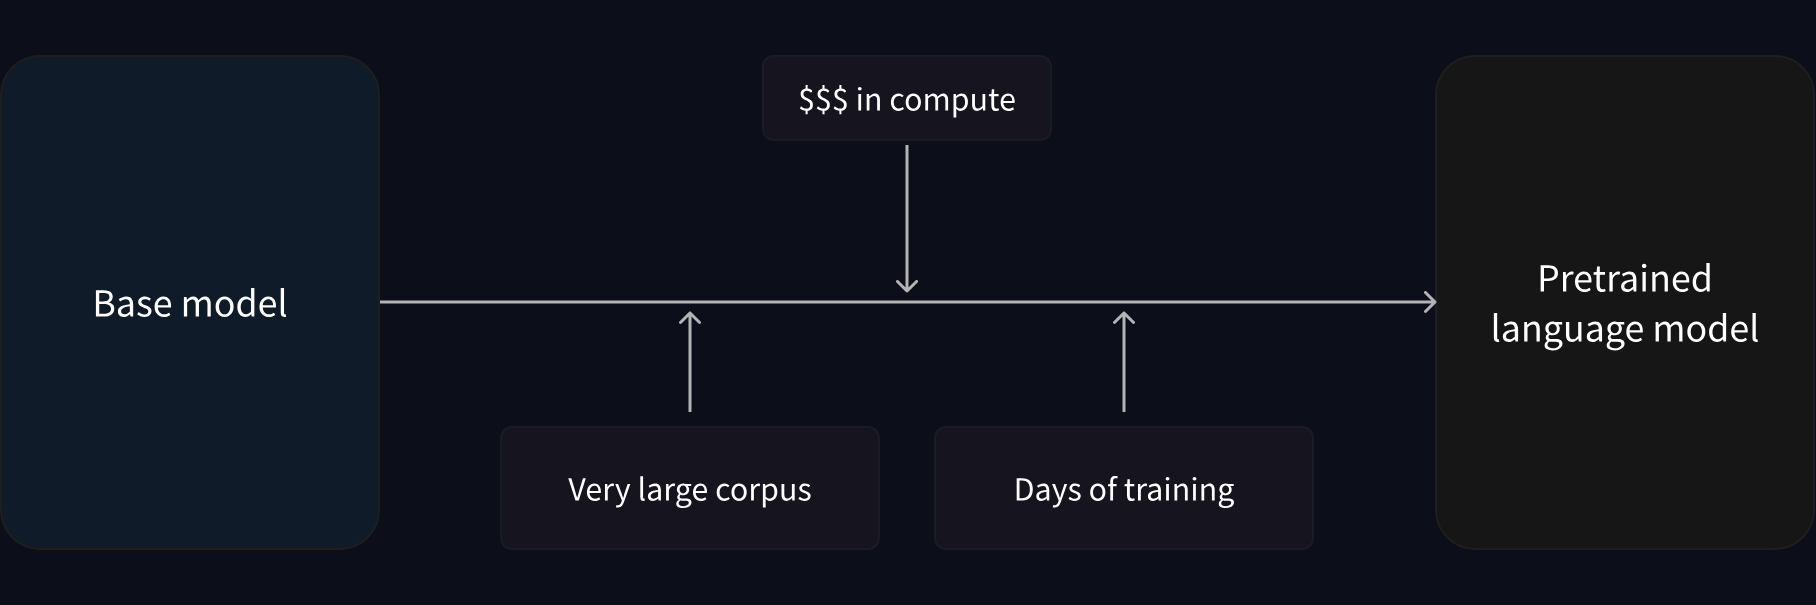

This pre-training is usually done on very large amount of data. Therefore, it requires a very large corpus of data, and training can take upto several weeks.

**Fine-tuning**, on the other hand, is the training done after a model has been pre-trained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task.

Fine-tuning will only require a limited amount of data: knowledge the pretrained model has acquired is **transferred**, hence the term transfer learning.

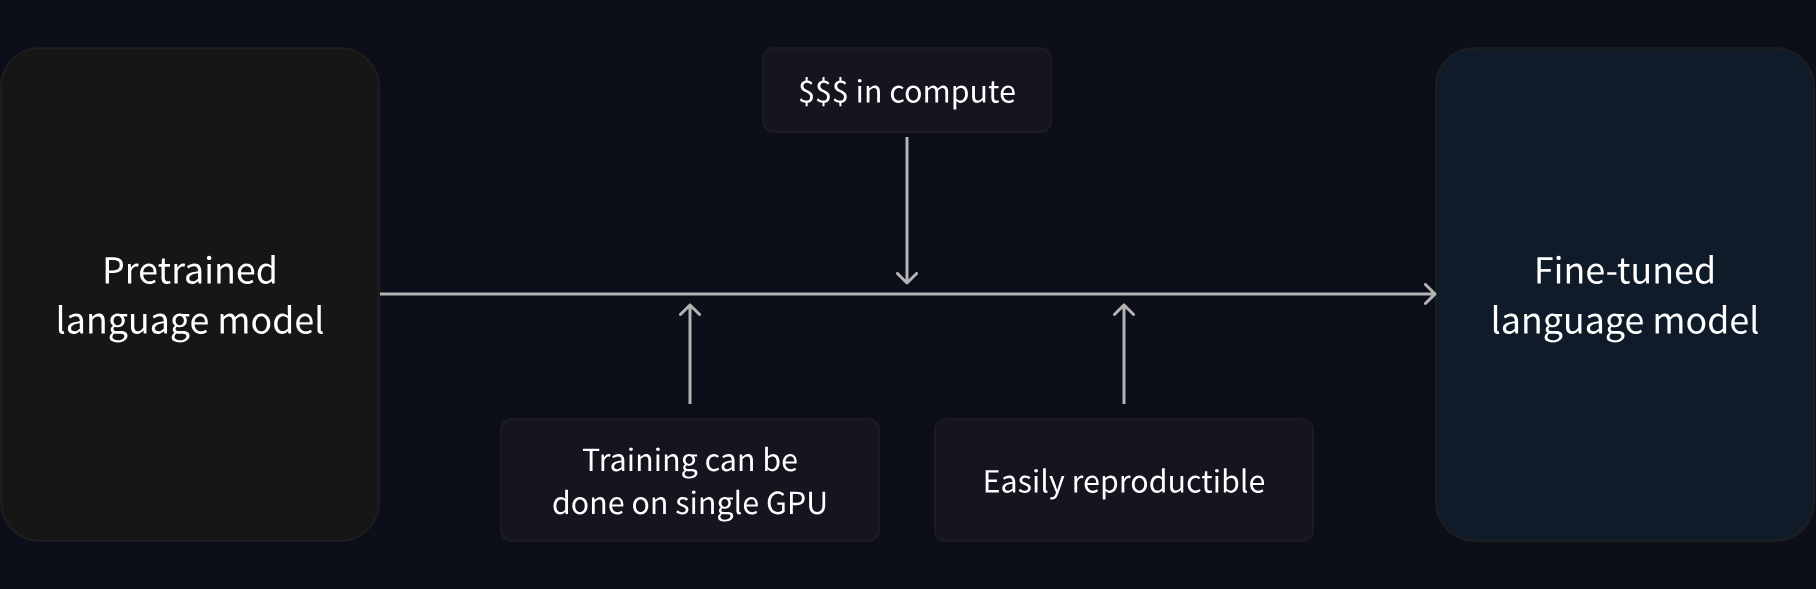

This process will also achieve better results than training from scratch (unless you have lots of data), which is why you should always try to leverage a pretrained model — one as close as possible to the task you have at hand — and fine-tune it.

### **General Architecture**
The model is primarily composed of two blocks:
1. **Encoders(left):** The encoders receives and input and builds representation of it (it's features or embedings). This means that the model is optimized to acquire understanding from the input.

2. **Decoder(right):** The decoder uses the encoder's representation (features) along with other iputs to generate a target sequence. This means model is optimized for generating outputs.

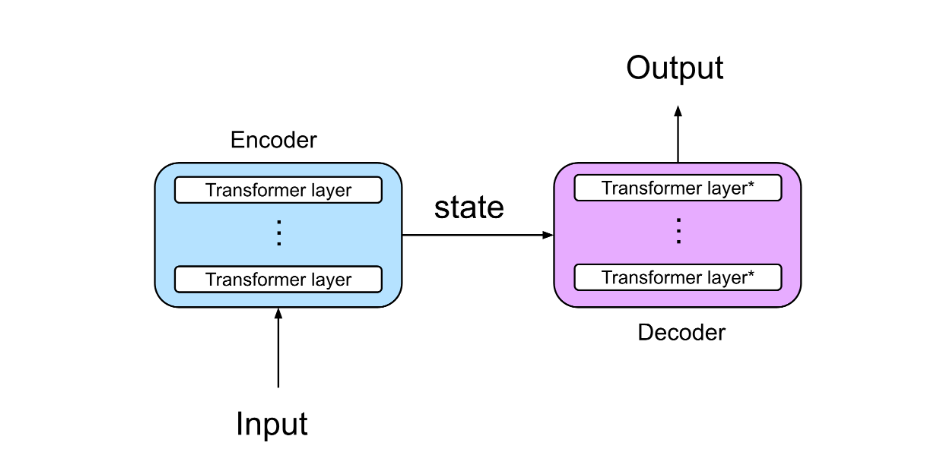

1. **Encoder-only models**: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.
2. **Decoder-only models**: Good for generative tasks such as text generation.
3. **Encoder-decoder models or sequence-to-sequence models**: Good for generative tasks that require an input, such as translation or summarization.

### **Attention layers**
A key feature of transformer models is that they are built with special layers called attention layers. Title of the paper introducing Transformer architecture was **Attention is all you Need.**

Self-attention is the core mechanism in Transformer models. It allows the model to look at other words in the sentence (including itself) when processing a particular word.

Because word meanings depend on context.
For example:

	1.	“He went to the bank to deposit money.” (→ financial institution)
	2.	“He sat on the bank of the river.” (→ river side)

The word “bank” means different things depending on surrounding words.
Self-attention helps the model understand such context dynamically.

### **The original architecture**
The Transformer model is composed of two major parts:

	•	Encoder (on the left)
	•	Decoder (on the right)

📥 Encoder: Understanding the Input Sentence

	•	Takes the source language sentence (e.g., English).
	•	Each word is embedded and passed through self-attention layers and feed-forward layers.
	•	The encoder layers capture contextual meaning of each word by letting them attend to every other word in the sentence (both left and right).
	•	Output: A rich set of contextual embeddings for each input word.

📤 Decoder: Generating the Target Sentence

	•	Takes previously generated target words (e.g., French words) and learns to generate the next word in sequence.
	•	Each decoder block has:
	•	Masked Self-Attention: Looks only at previously generated words, not future ones.
	•	Encoder-Decoder Attention: Allows decoder to attend to relevant parts of the input sentence (via encoder outputs).
	•	Feed-forward layers and finally softmax to predict next token.

**Why Masked Self-Attention in Decoder?**
During training, the full target sentence is given as input, but we want the model to learn sequential prediction, so:

1. It is forced to predict each word only based on the previous words.
2. The model is masked from seeing “future” tokens in target sentence during training.

         Input Sentence (e.g., "I am learning NLP")         Output Sentence (e.g., "Je apprends le NLP")
        ────────────────────────────────────────           ────────────────────────────────────────

                         [ Token Embeddings + Positional Encoding ]
                                        │
                                        ▼
                            ┌───────────────────────┐
                            │       Encoder Layer 1 │
                            └───────────────────────┘
                                        │
                         ┌───────────── Self-Attention ─────────────┐
                         │  Each token attends to ALL input tokens │
                         └─────────────────────────────────────────┘
                                        │
                           + Feed-Forward Neural Network (FFN)
                                        ▼
                            ┌───────────────────────┐
                            │       Encoder Layer N │
                            └───────────────────────┘
                                        │
                        Outputs: Context-rich encoded representations
                                        ▼
                              [ Encoder Output States ]

                                                    ▲
                                                    │
                                        ┌───────────────────────┐
                                        │     Decoder Layer 1   │
                                        └───────────────────────┘
                                       / \
               Masked Self-Attention  /   \  Encoder-Decoder Attention
               ┌─────────────────────┐     ┌──────────────────────────────┐
               │ Each token attends  │     │ Decoder attends to Encoder  │
               │ only to PAST tokens │     │ output for context mapping  │
               └─────────────────────┘     └──────────────────────────────┘
                                       \   /
                                        ▼ ▼
                               + Feed-Forward Neural Network (FFN)
                                        │
                                  [ Decoder Layer N ]
                                        ▼
                               Final Output Prediction
                                        │
                         [ Softmax Layer → Next Token Prediction ]

Note:
- During **training**, the decoder receives the full target sentence with **future tokens masked**.
- During **inference**, the decoder generates one token at a time sequentially.

**Few jargon better to know**

**Architecture**: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.

**Checkpoints**: These are the weights that will be loaded in a given architecture.

**Model**: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both. This course will specify architecture or checkpoint when it matters to reduce ambiguity.

## **1. Encoder Models**
Encoder models use only the encoder of a Transformer model. At each stage, the **attention layers can access all the words** in the initial sentence. These models are often characterized as having “**bi-directional**” attention, and are often called auto-encoding models.

**Encoder models** are a type of architecture in Natural Language Processing (NLP), primarily used to **understand and represent the meaning of input text**.

They take input text and encode it into **dense vector representations (embeddings)** that capture semantic meaning, context, and structure. These representations can then be used for various downstream tasks such as classification, similarity comparison, or information retrieval.



## ⚙️ How Encoder Models Work

- Input text is tokenized into smaller units (like words or subwords).
- Positional encoding is added to preserve word order.
- The input passes through multiple **self-attention layers** and **feed-forward layers** in the **encoder stack**.
- The output is a **contextualized embedding** for each token — i.e., the meaning of a word in context of the entire sentence.

## 📥 Use Cases of Encoder Models

| Task                        | Purpose |
|----------------------------|--------|
| **Text Classification**     | Spam detection, sentiment analysis, topic classification |
| **Named Entity Recognition (NER)** | Identifying people, locations, organizations in text |
| **Semantic Text Similarity**| Comparing the meaning of two texts |
| **Question Answering (QA)** | Identifying answers in context |
| **Feature Extraction**      | Producing embeddings for other ML models |


## 🚀 Popular Encoder Models

| Model Name     | Description |
|----------------|-------------|
| **BERT**       | Bidirectional Encoder Representations from Transformers. Trained to understand context from both directions. |
| **RoBERTa**    | Robustly optimized BERT; improved training for better performance. |
| **DistilBERT** | Smaller, faster, and lighter version of BERT with 97% of its performance. |
| **ALBERT**     | A lite version of BERT with fewer parameters and weight sharing. |
| **ELECTRA**    | More efficient pretraining using a replaced-token detection task. |



## **2. Decoder Models**
Decoder models use only the decoder of a Transformer model. At each stage, for a given word the **attention layers can only access the words positioned before it in the sentence**. These models are often called auto-regressive models.

**Decoder models** are a type of architecture used in Natural Language Processing (NLP), primarily focused on **text generation tasks**. They take an encoded input or a sequence of previously generated tokens and **generate text in a sequential manner**.

While **encoder models** are designed to understand and represent input text, **decoder models** are specialized in producing meaningful text outputs — word by word or token by token.

---

## ⚙️ How Decoder Models Work

- Decoder models generate one token at a time, conditioned on:
  - Previously generated tokens
  - (Optional) Encoded input context (in case of encoder-decoder models)
- They use **Masked Self-Attention** to ensure that the model only considers previously generated tokens (and not future ones) during training.
- The output is passed through a softmax layer to predict the next word/token.

---


**Decoder Layers → Next Token Prediction → Repeat until End Token**


## 📥 Use Cases of Decoder Models

| Task                         | Description |
|-----------------------------|-------------|
| **Text Generation**         | Generating coherent and contextually accurate text |
| **Story/Essay Writing**     | Generative content tasks |
| **Autocompletion**          | Predicting the next word or sentence |
| **Dialogue Generation**     | Powering chatbots and conversational AI |
| **Language Modeling**       | Predicting the probability of the next token in a sequence |

---

## 🚀 Popular Decoder Models

| Model Name     | Description |
|----------------|-------------|
| **GPT (Generative Pretrained Transformer)** | One of the most powerful decoder-based models for autoregressive text generation. |
| **GPT-2 / GPT-3 / GPT-4** | Successive versions of GPT with increasing size and capabilities. |
| **CTRL**       | A conditional transformer trained to control text generation style and content. |
| **GROVER**     | A model trained specifically for generating fake news to study detection methods. |

---

## **3. Sequence-to-sequence models**

Encoder-decoder models (also called sequence-to-sequence models) use both parts of the Transformer architecture. At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input.

# 🔁 Sequence-to-Sequence (Seq2Seq) Models in NLP

## 📘 What are Seq2Seq Models?

**Sequence-to-Sequence (Seq2Seq)** models are a class of models used in **Natural Language Processing (NLP)** where the input and output are **both sequences** — often of different lengths. They are especially powerful for tasks that require **transforming one sequence into another**, like **translation**, **summarization**, or **question answering**.

---

## ⚙️ How Do Seq2Seq Models Work?

A Seq2Seq model typically consists of **two main components**:

### 1️⃣ Encoder:
- Reads and **encodes the input sequence** (e.g., a sentence) into a **fixed-length context vector (latent representation)**.
- Captures the semantics of the input.

### 2️⃣ Decoder:
- Takes the context vector from the encoder and **generates the output sequence** token by token.
- Each token is generated based on the previously generated tokens and the encoder’s context.

**Input Sequence → [ Encoder ] → Context Vector → [ Decoder ] → Output Sequence**

## 🔄 Modern Seq2Seq Models (Transformer-based)

| Model | Description |
|-------|-------------|
| **T5 (Text-To-Text Transfer Transformer)** | Unified encoder-decoder for all NLP tasks |
| **BART (Bidirectional and Auto-Regressive Transformers)** | Combines bidirectional encoder + autoregressive decoder |
| **mBART** | Multilingual variant of BART |
| **MarianMT** | Transformer-based multilingual translation model |
| **PEGASUS** | Designed for abstractive text summarization |

---

## 🧠 Transformer vs Traditional Seq2Seq

| Traditional Seq2Seq | Transformer-based Seq2Seq |
|---------------------|----------------------------|
| Uses RNNs (LSTM/GRU) | Uses attention mechanisms and no recurrence |
| Sequential computation | Parallel computation |
| Less efficient on long texts | More scalable and performant |

## **Bias and limitations**



In [2]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'c

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


When asked to fill in the missing word in these two sentences, the model gives only **one gender-free answer** (waiter/waitress). The others are work occupations usually associated with one specific gender — and yes, **prostitute** ended up in the top 5 possibilities the model associates with **“woman” and “work.”** This happens even though BERT is one of the rare Transformer models not built by scraping data from all over the internet, but rather using apparently neutral data (it’s trained on the English Wikipedia and BookCorpus datasets).

When you use these tools, you therefore need to keep in the back of your mind that the original model you are using could very easily generate sexist, racist, or homophobic content. Fine-tuning the model on your data won’t make this intrinsic bias disappear.